# Baby Name Trends

## Module Imports

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

## Preparing DataFrame

In [31]:
data_dir = 'data/names'
baby_names = []

# iterate through each file in the data directory
sorted_filenames = sorted(filename for filename in os.listdir(data_dir) if filename.endswith('.txt') and filename.startswith("yob"))
for filename in sorted_filenames:
    year = filename[3:7]
    filepath = os.path.join(data_dir, filename)
    with open(filepath, "r") as f:
            for line in f:
                name, gender, count = line.strip().split(",")
                baby_names.append({"year": year, "name": name, "gender": gender, "count": int(count)})

df = pd.DataFrame(baby_names)
df.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


## Trends in Gender

Exploring the popular names is important because it helps us understand the cultural trends and values of a society. It can also provide insight into how certain names become popular and how they fall out of favor. 


The top 10 popular names for females are: ['Mary', 'Elizabeth', 'Patricia', 'Jennifer', 'Linda', 'Barbara', 'Margaret', 'Susan', 'Dorothy', 'Sarah']
The top 10 popular names for males are: ['James', 'John', 'Robert', 'Michael', 'William', 'David', 'Joseph', 'Richard', 'Charles', 'Thomas']



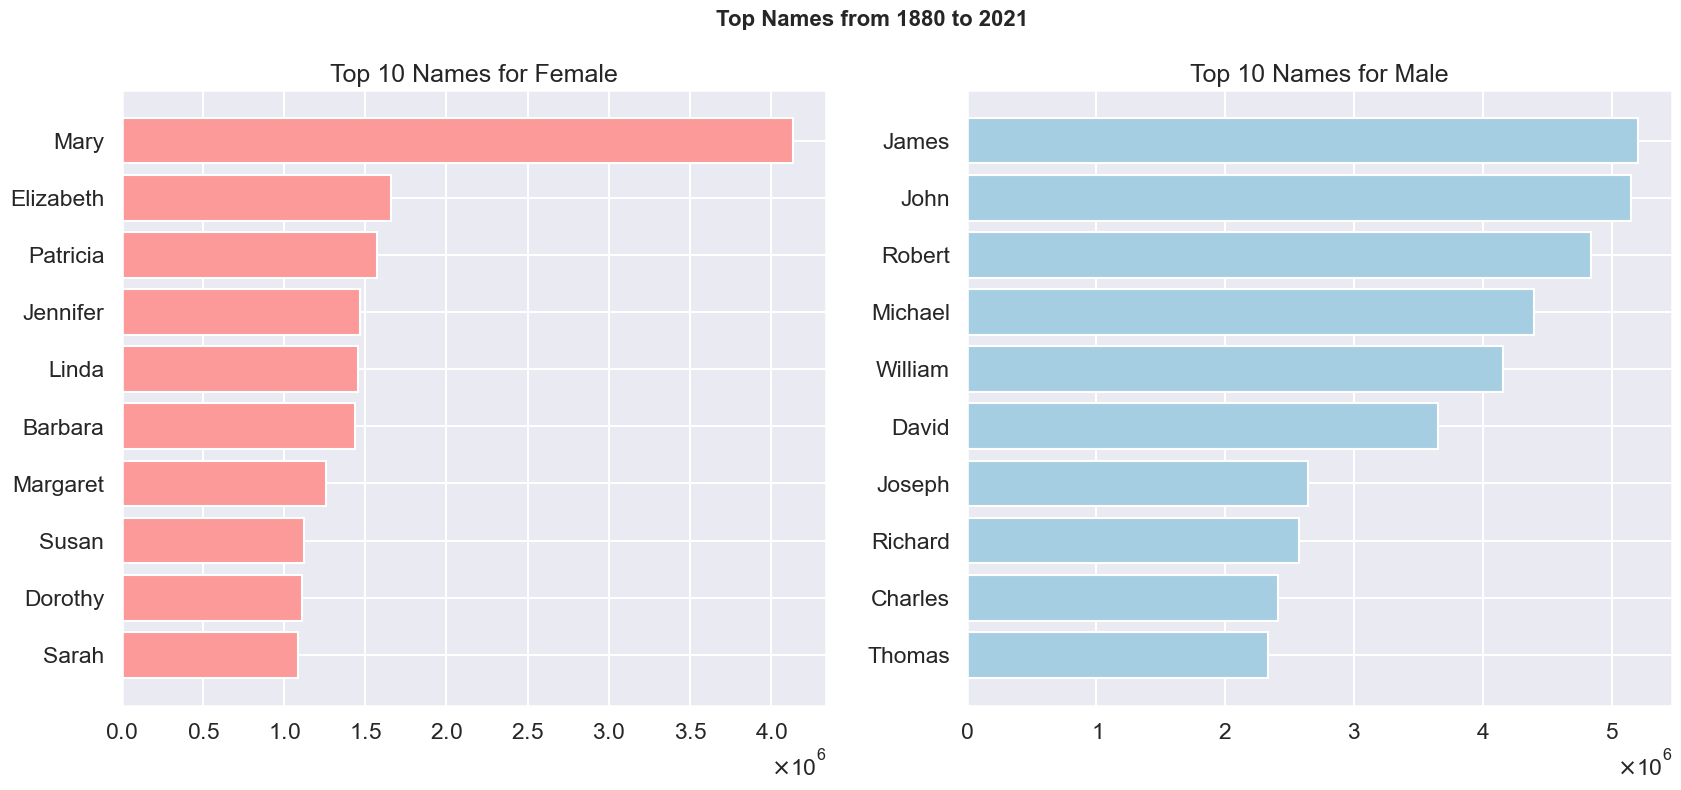

In [32]:
# Filter data frames based on assigned sex
df_fnames = df[df['gender'] == 'F']
df_popular_fnames = df_fnames.groupby('name')['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_top10_popular_fnames = df_popular_fnames.head(10)
df_mnames = df[df['gender'] == 'M']
df_popular_mnames = df_mnames.groupby('name')['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_top10_popular_mnames = df_popular_mnames.head(10)

# Extract the names from the data frames
df_top10_fnames_list = df_top10_popular_fnames['name'].tolist()
df_top10_mnames_list = df_top10_popular_mnames['name'].tolist()

summary = f"""
The top 10 popular names for females are: {df_top10_fnames_list}
The top 10 popular names for males are: {df_top10_mnames_list}
"""

print(summary)

# Create the figure and axes
sns.set_style('darkgrid')
sns.set_context('talk')
colors = sns.color_palette("Paired")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

# Plot the first chart on the first axis
ax1.barh(df_top10_popular_fnames['name'], df_top10_popular_fnames['count'], color=colors[4], label='Top Female Names')

# Set the x-axis formatter and other properties
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(True)
ax1.xaxis.set_major_formatter(formatter)
ax1.invert_yaxis()
ax1.set_title('Top 10 Names for Female')

# Plot the second chart on the second axis
ax2.barh(df_top10_popular_mnames['name'], df_top10_popular_mnames['count'], color=colors[0], label='Top Male Names')

# Set the x-axis formatter and other properties
ax2.xaxis.set_major_formatter(formatter)
ax2.invert_yaxis()
ax2.set_title('Top 10 Names for Male')

fig.suptitle('Top Names from 1880 to 2021', fontsize=16, fontweight='bold')

# Display the chart
plt.show()

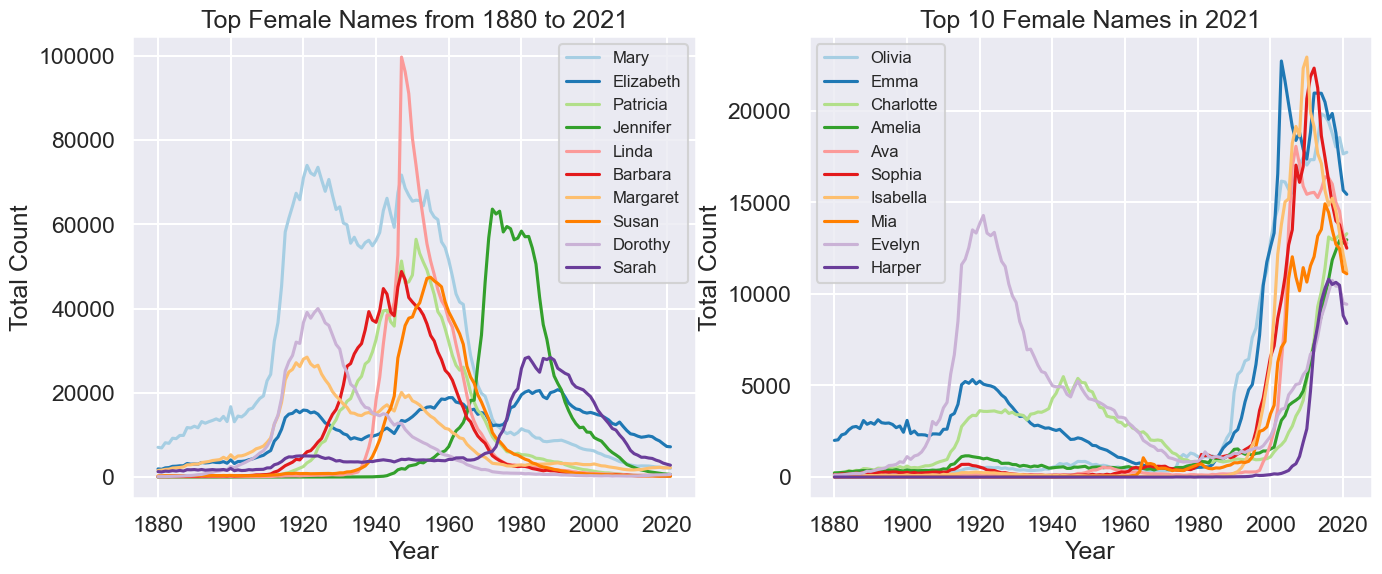

In [9]:
df_top10_fnames = df[(df['gender'] == 'F') & (df['name'].isin(df_top10_fnames_list))]
df_top10_fnames = df_top10_fnames.pivot(index='year', columns='name', values='count').fillna(0)

# Top 10 female names in 2021
df_fnames_2021 = df[(df['gender'] == 'F') & (df['year'] == '2021')]
df_fnames_2021 = df_fnames_2021.groupby('name')['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_fnames_2021 = df_fnames_2021.head(10)
top10_f_2021 = df_fnames_2021['name'].tolist()
df_top10_f_2021 = df[(df['gender'] == 'F') & (df['name'].isin(top10_f_2021))]
df_top10_f_2021_pivot = df_top10_f_2021.pivot(index='year', columns='name', values='count').fillna(0)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 female names of all time trend over time
colors = sns.color_palette("Paired")
for i,name in enumerate(df_top10_fnames_list):
    ax1.plot(df_top10_fnames.index, df_top10_fnames[name], label=name, color=colors[i])
ax1.set_xlabel('Year')
ax1.set_xticks(df_top10_fnames.index[::20], fontsize=10)
ax1.set_ylabel('Total Count')
ax1.set_title('Top Female Names from 1880 to 2021')
ax1.legend(fontsize=12)

# Top 10 female names in 2021
for i,name in enumerate(top10_f_2021):
    ax2.plot(df_top10_f_2021_pivot.index, df_top10_f_2021_pivot[name], label=name, color=colors[i])
ax2.set_xlabel('Year')
ax2.set_xticks(df_top10_f_2021_pivot.index[::20], fontsize=10)
ax2.set_ylabel('Total Count')
ax2.set_title('Top 10 Female Names in 2021')
ax2.legend(fontsize=12)

# Show the plot
plt.show()

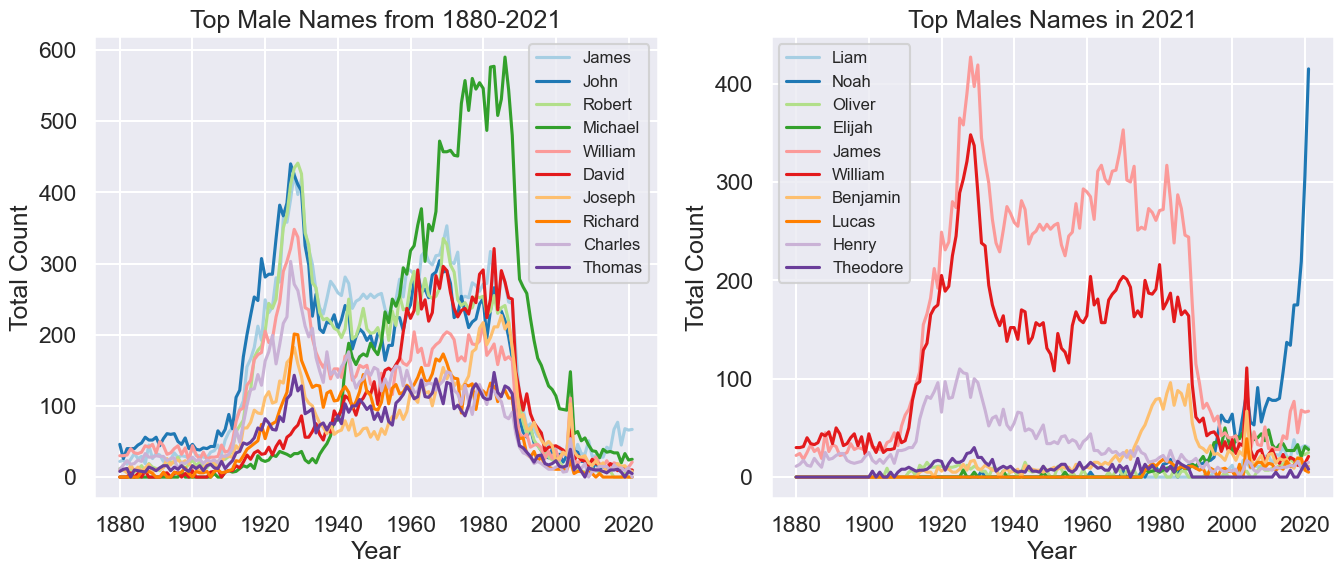

In [10]:
df_top10_mnames = df[(df['gender'] == 'F') & (df['name'].isin(df_top10_mnames_list))]
df_top10_mnames = df_top10_mnames.pivot(index='year', columns='name', values='count').fillna(0)

# Top 10 male names in 2021
df_male_2021 = df[(df['gender'] == 'M') & (df['year'] == '2021')]
df_popular_male_names_2021 = df_male_2021.groupby('name')['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_popular_male_names_2021 = df_popular_male_names_2021.head(10)
top10_m_2021 = df_popular_male_names_2021['name'].tolist()
df_top10_m_2021 = df[(df['gender'] == 'F') & (df['name'].isin(top10_m_2021))]
df_top10_m_2021_pivot = df_top10_m_2021.pivot(index='year', columns='name', values='count').fillna(0)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 male names of all time trend over time
colors = sns.color_palette("Paired")
for i,name in enumerate(df_top10_mnames_list):
    ax1.plot(df_top10_mnames.index, df_top10_mnames[name], label=name, color=colors[i])
ax1.set_xlabel('Year')
ax1.set_xticks(df_top10_mnames.index[::20], fontsize=10)
ax1.set_ylabel('Total Count')
ax1.set_title('Top Male Names from 1880-2021')
ax1.legend(fontsize=12)

# Top 10 male names in 2021
for i,name in enumerate(top10_m_2021):
    ax2.plot(df_top10_m_2021_pivot.index, df_top10_m_2021_pivot[name], label=name, color=colors[i])
ax2.set_xlabel('Year')
ax2.set_xticks(df_top10_m_2021_pivot.index[::20], fontsize=10)
ax2.set_ylabel('Total Count')
ax2.set_title('Top Males Names in 2021')
ax2.legend(fontsize=12)

# Show the plot
plt.show()

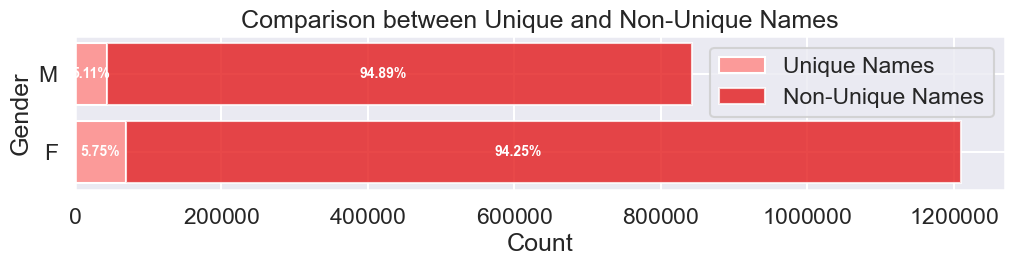

In [11]:
# Gender Distribution
df_grouped_gender = df.groupby(['gender']).agg({'name': ['size', 'nunique']})
df_grouped_gender.columns = ['total', 'unique']
df_grouped_gender['unique_rate'] = round(df_grouped_gender['unique'] / df_grouped_gender['total'], 4) * 100
df_grouped_gender = df_grouped_gender.reset_index()

# Create the horizontal bar chart
sns.set_style('darkgrid')
sns.set_context('talk')
colors = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(12, 2))

ax.barh(df_grouped_gender['gender'], df_grouped_gender['unique'], color=colors[4], label='Unique Names')
ax.barh(df_grouped_gender['gender'], df_grouped_gender['total'] - df_grouped_gender['unique'],
        left=df_grouped_gender['unique'], color=colors[5], alpha=0.8, label='Non-Unique Names')

for i, v in enumerate(df_grouped_gender['unique_rate']):
    ax.text(df_grouped_gender['unique'][i] / 2, i, f"{v:.2f}%", color='white', fontweight='bold', ha='center',
            va='center', fontsize=10)
    ax.text(df_grouped_gender['total'][i] / 2, i, f"{100 - v:.2f}%", color='white', fontweight='bold', ha='center',
            va='center', fontsize=10)

# Set the x-axis formatter
formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Comparison between Unique and Non-Unique Names')
plt.legend()
plt.show()


gender     name   total_f   total_m     total    rate_f    rate_m  rate_diff
0         Kerry   48610.0   49770.0   98380.0  0.494104  0.505896   0.005896
1       Emerson   26304.0   28321.0   54625.0  0.481538  0.518462   0.018462
2        Jackie   90928.0   78684.0  169612.0  0.536094  0.463906   0.036094
3       Frankie   34954.0   41376.0   76330.0  0.457933  0.542067   0.042067
4         Quinn   41171.0   34303.0   75474.0  0.545499  0.454501   0.045499
5         Riley  123172.0   98494.0  221666.0  0.555665  0.444335   0.055665
6         Jaime   49914.0   69610.0  119524.0  0.417607  0.582393   0.082393
7        Harley   27687.0   39777.0   67464.0  0.410397  0.589603   0.089603
8         Casey   77093.0  112422.0  189515.0  0.406791  0.593209   0.093209
9           Pat   40123.0   26733.0   66856.0  0.600141  0.399859   0.100141


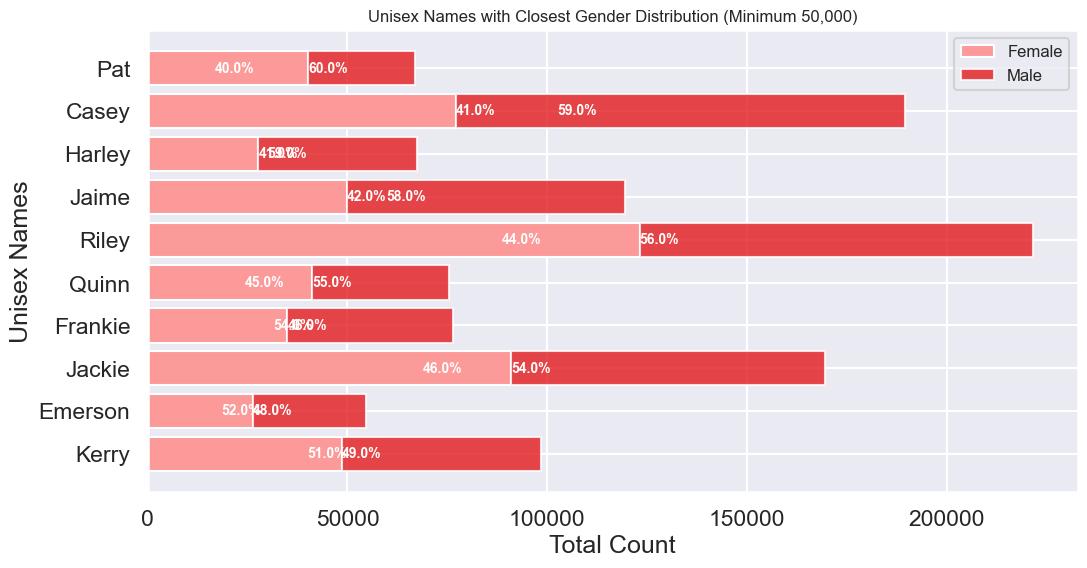

In [12]:
# Filter for names that appear in both genders

df_same_names = df.pivot_table(index='name', columns='gender', values='count', aggfunc='sum')
df_same_names = df_same_names[df_same_names['F'].notnull() & df_same_names['M'].notnull()]
df_same_names['total'] = df_same_names['F'] + df_same_names['M']
df_same_names = df_same_names[df_same_names['total'] >= 50000]
df_same_names = df_same_names.sort_values('total', ascending=False)
df_same_names = df_same_names.rename(columns={'F': 'total_f', 'M': 'total_m'}).reset_index()
df_same_names['rate_f'] = df_same_names['total_f'] / df_same_names['total']
df_same_names['rate_m'] = df_same_names['total_m'] / df_same_names['total']
df_same_names['rate_diff'] = abs(df_same_names['rate_f'] - 0.5)
df_same_names = df_same_names.sort_values(by=['rate_diff', 'total'], ascending=[True, False])
df_top10_unisex_names = df_same_names.reset_index(drop=True).head(10)

print(df_top10_unisex_names)
# Create the horizontal bar chart
sns.set_style('darkgrid')
sns.set_context('talk')
colors = sns.color_palette("Paired")

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(df_top10_unisex_names['name'], df_top10_unisex_names['total_f'], color=colors[4], label='Female')
ax.barh(df_top10_unisex_names['name'], df_top10_unisex_names['total_m'], left=df_top10_unisex_names['total_f'], alpha=0.8, color=colors[5], label='Male')

for i, v in enumerate(df_top10_unisex_names['name']):
    ax.text(df_top10_unisex_names['total_f'][i], i, f"{round(df_top10_unisex_names['rate_f'][i] * 100,0)}%", color='white', fontweight='bold', ha='left',
            va='center', fontsize=10)
    ax.text(df_top10_unisex_names['total_m'][i], i, f"{round(df_top10_unisex_names['rate_m'][i] * 100,0)}%", color='white', fontweight='bold', ha='right',
            va='center', fontsize=10)
    
plt.xlabel('Total Count')
plt.ylabel('Unisex Names')
plt.title('Unisex Names with Closest Gender Distribution (Minimum 50,000)', fontsize=12)
plt.legend(fontsize=12)
plt.show()


## Trends in the Last Letters of a Name

When analyzing names, the last letters of a name can be crucial to understanding how it sounds and how memorable it is. However, pronouncing a name in English can be challenging due to many factors, such as the origin of the name, the speaker's dialect, accent, or personal preference. To make it simpler, we can focus on four common syllable structures: Vowel-Vowel, Consonant-Vowel, Vowel-Consonant, and Vowel-Consonant-Consonant. These syllable structures are frequently found in English names and reflect the most typical pronunciations. By looking at how these syllables are distributed in a dataset, we can gain a better understanding of naming patterns.

In [13]:
vv_sounds = ['ai','ay','au','ea','ee','ei','eo','eu','ey','ia','ie','io','iu','oa','oe','oi','oo','ou','ua','ue','ui','uo','uy']
cv_sounds = ['ba','be','bi','bo','bu','by','ca','ce','ci','co','cu','cy','da','de','di','do','du','dy','fa','fe','fi','fo','fu','fy','ga','ge','gi','go','gu','gy','ha','he','hi','ho','hu','hy','ja','je','ji','jo','ju','jy','ka','ke','ki','ko','ku','ky','la','le','li','lo','lu','ly','ma','me','mi','mo','mu','my','na','ne','ni','no','nu','ny','pa','pe','pi','po','pu','py','ra','re','ri','ro','ru','ry','sa','se','si','so','su','sy','ta','te','ti','to','tu','ty','va','ve','vi','vo','vu','vy','wa','we','wi','wo','wu','wy','xa','xe','xi','xo','xu','xy','ya','ye','yi','yo','yu','za','ze','zi','zo','zu','zy']
vc_sounds = ['ab', 'eb', 'ib', 'ob', 'ub', 'ec', 'ad', 'ed', 'id', 'od', 'ud', 'af', 'ef', 'if', 'of', 'uf', 'ag', 'eg', 'ig', 'og', 'ug', 'ah', 'eh', 'ih', 'oh', 'uh', 'ak', 'ek', 'ik', 'ok', 'uk', 'al', 'el', 'il', 'ol', 'ul', 'am', 'em', 'im', 'om', 'um', 'an', 'en', 'in', 'on', 'un', 'ap', 'ep', 'ip', 'op', 'up', 'ar', 'er', 'ir', 'or', 'ur', 'as', 'es', 'is', 'os', 'us', 'at', 'et', 'it', 'ot', 'ut', 'av', 'ev', 'iv', 'ov', 'uv', 'aw', 'ew', 'iw', 'ow', 'uw', 'ax', 'ex', 'ix', 'ox', 'ux', 'ay', 'ey', 'iy', 'oy', 'uy']
vcc_sounds = ['act', 'add', 'aff', 'ask', 'asp', 'apt', 'ark', 'arm', 'art', 'ash', 'ass', 'amp', 'and', 'ant', 'end', 'elt', 'elm', 'elf', 'all', 'ilk', 'ill', 'elf', 'elt', 'elp', 'elm', 'els', 'elf', 'alt', 'old', 'oll', 'olp', 'olt', 'ulk', 'ull', 'ulp', 'ult', 'elf', 'alm', 'all', 'alp', 'alt', 'olm', 'oll', 'olp', 'olt', 'ulm', 'ull', 'ulp', 'ult', 'elm', 'elm', 'alp', 'ulp']
combinations = len(vv_sounds) + len(cv_sounds) + len(vc_sounds) + len(vcc_sounds)
summary = f"""
    Vowel-vowel sounds contain {len(vv_sounds)} combinations, {len(vv_sounds) / combinations * 100:.2f}% of total.
    Vowel-consonant sounds contain {len(cv_sounds)} combinations, {len(cv_sounds) / combinations * 100:.2f}% of total.
    Consonant-vowel sounds contain {len(vc_sounds)} combinations, {len(vc_sounds) / combinations * 100:.2f}% of total.
    Vowel-consonant-consonant sounds contain {len(vcc_sounds)} combinations, {len(vcc_sounds) / combinations * 100:.2f}% of total.
    Total number of combinations: {combinations}
"""
print(summary)

combinations_breakdown = {
    'v-v': len(vv_sounds) / combinations * 100,
    'c-v': len(cv_sounds) / combinations * 100,
    'v-c': len(vc_sounds) / combinations * 100,
    'v-c-c': len(vcc_sounds) / combinations * 100,
    ' ': 0
}

print(combinations_breakdown)


    Vowel-vowel sounds contain 23 combinations, 8.19% of total.
    Vowel-consonant sounds contain 119 combinations, 42.35% of total.
    Consonant-vowel sounds contain 86 combinations, 30.60% of total.
    Vowel-consonant-consonant sounds contain 53 combinations, 18.86% of total.
    Total number of combinations: 281

{'v-v': 8.185053380782918, 'c-v': 42.34875444839858, 'v-c': 30.604982206405694, 'v-c-c': 18.86120996441281, ' ': 0}


In [14]:
df_unique_names = df.groupby('name')['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_unique_names_vv = df_unique_names[df_unique_names['name'].str.endswith(tuple(vv_sounds))]
df_unique_names_vv = df_unique_names_vv.reset_index(drop=True)
df_unique_names_cv = df_unique_names[df_unique_names['name'].str.endswith(tuple(cv_sounds))]
df_unique_names_cv = df_unique_names_cv.reset_index(drop=True)
df_unique_names_vc = df_unique_names[df_unique_names['name'].str.endswith(tuple(vc_sounds))]
df_unique_names_vc = df_unique_names_vc.reset_index(drop=True)
df_unique_names_vcc = df_unique_names[df_unique_names['name'].str.endswith(tuple(vcc_sounds))]
df_unique_names_vcc = df_unique_names_vcc.reset_index(drop=True)

summary = f"""
    Unique names with v-v last letters contain {len(df_unique_names_vv)} names, {len(df_unique_names_vv) / len(df_unique_names) * 100:.2f}% of total.
    Unique names with c-v last letters contain {len(df_unique_names_cv)} names, {len(df_unique_names_cv) / len(df_unique_names) * 100:.2f}% of total.
    Unique names with v-c last letters contain {len(df_unique_names_vc)} names, {len(df_unique_names_vc) / len(df_unique_names) * 100:.2f}% of total.
    Unique names with v-c-c last letters contain {len(df_unique_names_vcc)} names, {len(df_unique_names_vcc) / len(df_unique_names) * 100:.2f}% of total.
    Total number of unique names: {len(df_unique_names)}
"""
print(summary)

combinations_found_breakdown = {
    'v-v': len(df_unique_names_vv) / len(df_unique_names) * 100,
    'c-v': len(df_unique_names_cv)  / len(df_unique_names) * 100,
    'v-c': len(df_unique_names_vc)  / len(df_unique_names) * 100,
    'v-c-c': len(df_unique_names_vcc) / len(df_unique_names) * 100,
    'none': 100 - (len(df_unique_names_vv) / len(df_unique_names) * 100 + len(df_unique_names_cv)  / len(df_unique_names) * 100 + len(df_unique_names_vc)  / len(df_unique_names) * 100 + len(df_unique_names_vcc) / len(df_unique_names) * 100)
}
print(combinations_found_breakdown)


    Unique names with v-v last letters contain 14397 names, 14.21% of total.
    Unique names with c-v last letters contain 43267 names, 42.70% of total.
    Unique names with v-c last letters contain 32988 names, 32.55% of total.
    Unique names with v-c-c last letters contain 619 names, 0.61% of total.
    Total number of unique names: 101338

{'v-v': 14.206911523811403, 'c-v': 42.6957311176459, 'v-c': 32.55244824251515, 'v-c-c': 0.610827132960982, 'none': 9.934081983066577}


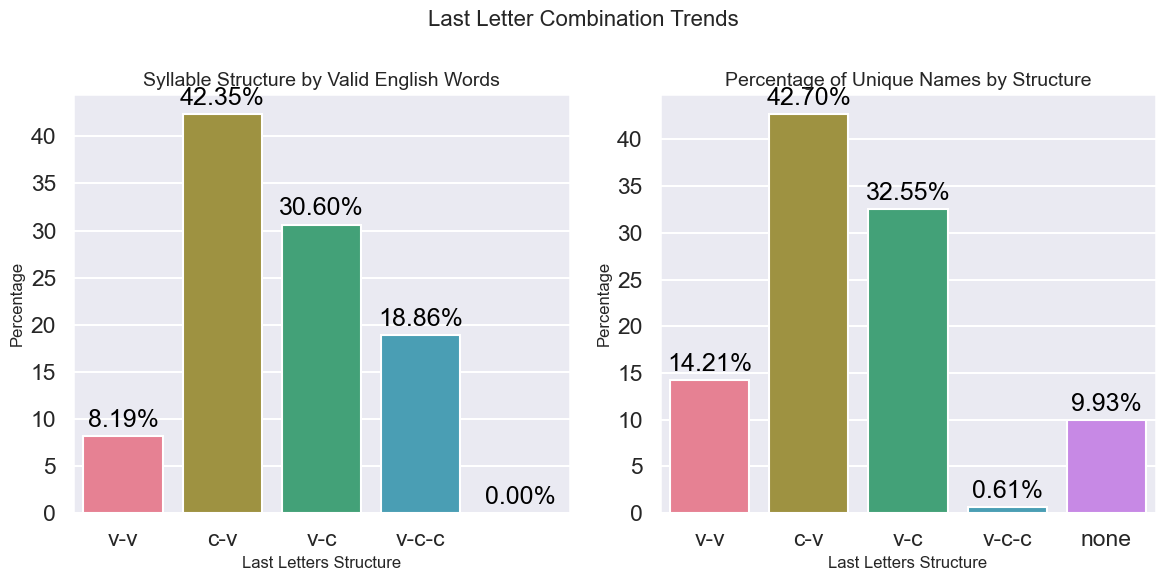

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))

# Bar chart for breakdown of last letter combinations in valid English words
plt.subplot(1, 2, 1)
ax = sns.barplot(x=list(combinations_breakdown.keys()), y=list(combinations_breakdown.values()), palette='husl')

# Add text labels for the bar percentages
for i, v in enumerate(combinations_breakdown.values()):
    ax.text(i, v + 1, f"{v:.2f}%", color='black', ha='center')

plt.xlabel('Last Letters Structure',fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Syllable Structure by Valid English Words', fontsize=14)

# Bar chart for percentage of unique names by syllable structure compared to total number of unique names
plt.subplot(1, 2, 2)
ax = sns.barplot(x=list(combinations_found_breakdown.keys()), y=list(combinations_found_breakdown.values()), palette='husl')

# Add text labels for the bar percentages
for i, v in enumerate(combinations_found_breakdown.values()):
    ax.text(i, v + 1, f"{v:.2f}%", color='black', ha='center')

plt.xlabel('Last Letters Structure',fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Unique Names by Structure', fontsize=14)
plt.suptitle('Last Letter Combination Trends', fontsize=16)

plt.tight_layout()
plt.show()

The high relative frequencies of consonant-vowel and vowel-consonant last letter structures suggest that these sound combinations are more popular choices for naming babies than vowel-vowel or vowel-consonant-consonant combinations. This may indicate a preference for names that have a balanced and harmonious sound, or for names that are easy to pronounce and remember.

### Consonant-Vowel and Consonant-Vowel Structures

The script below takes a while to complete.

In [16]:
cv_counts = {}

# If vc pattern is found, add the count of the name to the total count for the pattern
for name in df_unique_names_cv['name']:
    for pattern in cv_sounds:
        if name.endswith(pattern):
            # If the ending pattern is found, add the count of the name to the total count for the pattern
            if pattern in cv_counts:
                cv_counts[pattern] += int(df_unique_names_cv[df_unique_names_cv['name'] == name]['count'])
            else:
                cv_counts[pattern] = int(df_unique_names_cv[df_unique_names_cv['name'] == name]['count'])

# Convert the dictionary to a dataframe
df_unique_names_cv_grouped = pd.DataFrame.from_dict(cv_counts, orient='index', columns=['count'])
df_unique_names_cv_grouped = df_unique_names_cv_grouped.reset_index()
df_unique_names_cv_grouped = df_unique_names_cv_grouped.rename(columns={'index': 'structure'})
df_unique_names_cv_grouped = df_unique_names_cv_grouped.sort_values(by='count', ascending=False)

In [17]:
vc_counts = {}

# If vc pattern is found, add the count of the name to the total count for the pattern
for name in df_unique_names_vc['name']:
    for pattern in vc_sounds:
        if name.endswith(pattern):
            if pattern in vc_counts:
                vc_counts[pattern] += int(df_unique_names_vc[df_unique_names_vc['name'] == name]['count'])
            else:
                vc_counts[pattern] = int(df_unique_names_vc[df_unique_names_vc['name'] == name]['count'])

# Convert the dictionary to a dataframe
df_unique_names_vc_grouped = pd.DataFrame.from_dict(vc_counts, orient='index', columns=['count'])
df_unique_names_vc_grouped = df_unique_names_vc_grouped.reset_index()
df_unique_names_vc_grouped = df_unique_names_vc_grouped.rename(columns={'index': 'structure'})
df_unique_names_vc_grouped = df_unique_names_vc_grouped.sort_values(by='count', ascending=False)


In [18]:
vv_counts = {}

# If vc pattern is found, add the count of the name to the total count for the pattern
for name in df_unique_names_vv['name']:
    for pattern in vv_sounds:
        if name.endswith(pattern):
            if pattern in vv_counts:
                vv_counts[pattern] += int(df_unique_names_vv[df_unique_names_vv['name'] == name]['count'])
            else:
                vv_counts[pattern] = int(df_unique_names_vv[df_unique_names_vv['name'] == name]['count'])

# Convert the dictionary to a dataframe
df_unique_names_vv_grouped = pd.DataFrame.from_dict(vv_counts, orient='index', columns=['count'])
df_unique_names_vv_grouped = df_unique_names_vv_grouped.reset_index()
df_unique_names_vv_grouped = df_unique_names_vv_grouped.rename(columns={'index': 'structure'})
df_unique_names_vv_grouped = df_unique_names_vv_grouped.sort_values(by='count', ascending=False)


In [19]:
vcc_counts = {}

# If v-c-c pattern is found, add the count of the name to the total count for the pattern
for name in df_unique_names_vcc['name']:
    for pattern in vcc_sounds:
        if name.endswith(pattern):
            if pattern in vcc_counts:
                vcc_counts[pattern] += int(df_unique_names_vcc[df_unique_names_vcc['name'] == name]['count'])
            else:
                vcc_counts[pattern] = int(df_unique_names_vcc[df_unique_names_vcc['name'] == name]['count'])

# Convert the dictionary to a dataframe
df_unique_names_vcc_grouped = pd.DataFrame.from_dict(vcc_counts, orient='index', columns=['count'])
df_unique_names_vcc_grouped = df_unique_names_vcc_grouped.reset_index()
df_unique_names_vcc_grouped = df_unique_names_vcc_grouped.rename(columns={'index': 'structure'})
df_unique_names_vcc_grouped = df_unique_names_vcc_grouped.sort_values(by='count', ascending=False)

In [20]:
# Summary for Consonant-Vowels
df_top10_cv = df_unique_names_cv_grouped.sort_values('count', ascending=False)
df_top10_cv = df_top10_cv.reset_index(drop=True).head(10)
df_top10_cv_list = df_top10_cv['structure'].tolist()
cv_patterns_not_found = set(cv_sounds) - set(df_unique_names_cv['name'].str[-2:])

summary = f"""
The most consonant-vowels combinations found in the last letters of unique names are
{df_top10_cv_list}, 
while the following combinations are not found
{cv_patterns_not_found}
"""
print(summary)

# Summary for Vowels-Consonant

df_top10_vc = df_unique_names_vc_grouped.sort_values('count', ascending=False)
df_top10_vc = df_top10_vc.reset_index(drop=True).head(10)
df_top10_vc_list = df_top10_vc['structure'].tolist()
vc_patterns_not_found = set(vc_sounds) - set(df_unique_names_vc['name'].str[-2:])

summary = f"""
The most consonent-vowel combinations found in the last letters of unique names are
{df_top10_vc_list}, 
while the following combinations are not found
{vc_patterns_not_found}
"""
print(summary)

# Summary for Vowels-Vowels
df_top10_vv = df_unique_names_vv_grouped.sort_values('count', ascending=False)
df_top10_vv = df_top10_vv.reset_index(drop=True).head(10)
df_top10_vv_list = df_top10_vv['structure'].tolist()
vv_patterns_not_found = set(vv_sounds) - set(df_unique_names_vv['name'].str[-2:])
summary = f"""
The most vowel-vowel combinations found in the last letters of unique names are
{df_top10_vv_list},
while the following combinations are not found
{vv_patterns_not_found}
"""
print(summary)

# Summary for Vowels-Consonant-Consonant
df_top10_vcc = df_unique_names_vcc_grouped.sort_values('count', ascending=False)
df_top10_vcc = df_top10_vcc.reset_index(drop=True).head(10)
df_top10_vcc_list = df_top10_vcc['structure'].tolist()
vcc_patterns_not_found = set(vcc_sounds) - set(df_unique_names_vcc['name'].str[-3:])
summary = f"""
The most vowel-consonant-consonant combinations found in the last letters of unique names are
{df_top10_vcc_list},
while the following combinations are not found
{vcc_patterns_not_found}
"""
print(summary)



The most consonant-vowels combinations found in the last letters of unique names are
['ne', 'na', 'ry', 'ra', 'la', 'ce', 'da', 'le', 'ly', 'sa'], 
while the following combinations are not found
{'gu', 'fu', 'xu', 'pu', 'xo', 'cu'}


The most consonent-vowel combinations found in the last letters of unique names are
['an', 'on', 'el', 'er', 'en', 'es', 'ey', 'in', 'ah', 'am'], 
while the following combinations are not found
{'iw'}


The most vowel-vowel combinations found in the last letters of unique names are
['ie', 'ia', 'ey', 'ee', 'ua', 'oe', 'ay', 'ea', 'io', 'ue'],
while the following combinations are not found
set()


The most vowel-consonant-consonant combinations found in the last letters of unique names are
['ark', 'all', 'old', 'ill', 'and', 'ant', 'art', 'oll', 'elt', 'ash'],
while the following combinations are not found
{'olp', 'asp', 'ulm', 'elp', 'ulp', 'act', 'apt', 'ulk', 'elf'}



In [21]:
print(df_top10_cv['structure'].tolist(),df_top10_cv['count'].tolist())
print(df_top10_vc['structure'].tolist(),df_top10_vc['count'].tolist())
print(df_top10_vv['structure'].tolist(),df_top10_vv['count'].tolist())
print(df_top10_vcc['structure'].tolist(),df_top10_vcc['count'].tolist())

['ne', 'na', 'ry', 'ra', 'la', 'ce', 'da', 'le', 'ly', 'sa'] [12432602, 11480092, 11461690, 8310373, 6769603, 5875745, 5530501, 5344343, 4473004, 4364303]
['an', 'on', 'el', 'er', 'en', 'es', 'ey', 'in', 'ah', 'am'] [16634319, 12724968, 12258212, 11667024, 11360052, 9305430, 8942101, 8150742, 6290790, 5613524]
['ie', 'ia', 'ey', 'ee', 'ua', 'oe', 'ay', 'ea', 'io', 'ue'] [14936621, 10754249, 8942101, 1931269, 1265898, 958561, 944334, 941031, 931254, 530245]
['ark', 'all', 'old', 'ill', 'and', 'ant', 'art', 'oll', 'elt', 'ash'] [1414660, 827290, 701213, 455649, 334537, 207702, 125593, 90834, 82524, 67209]


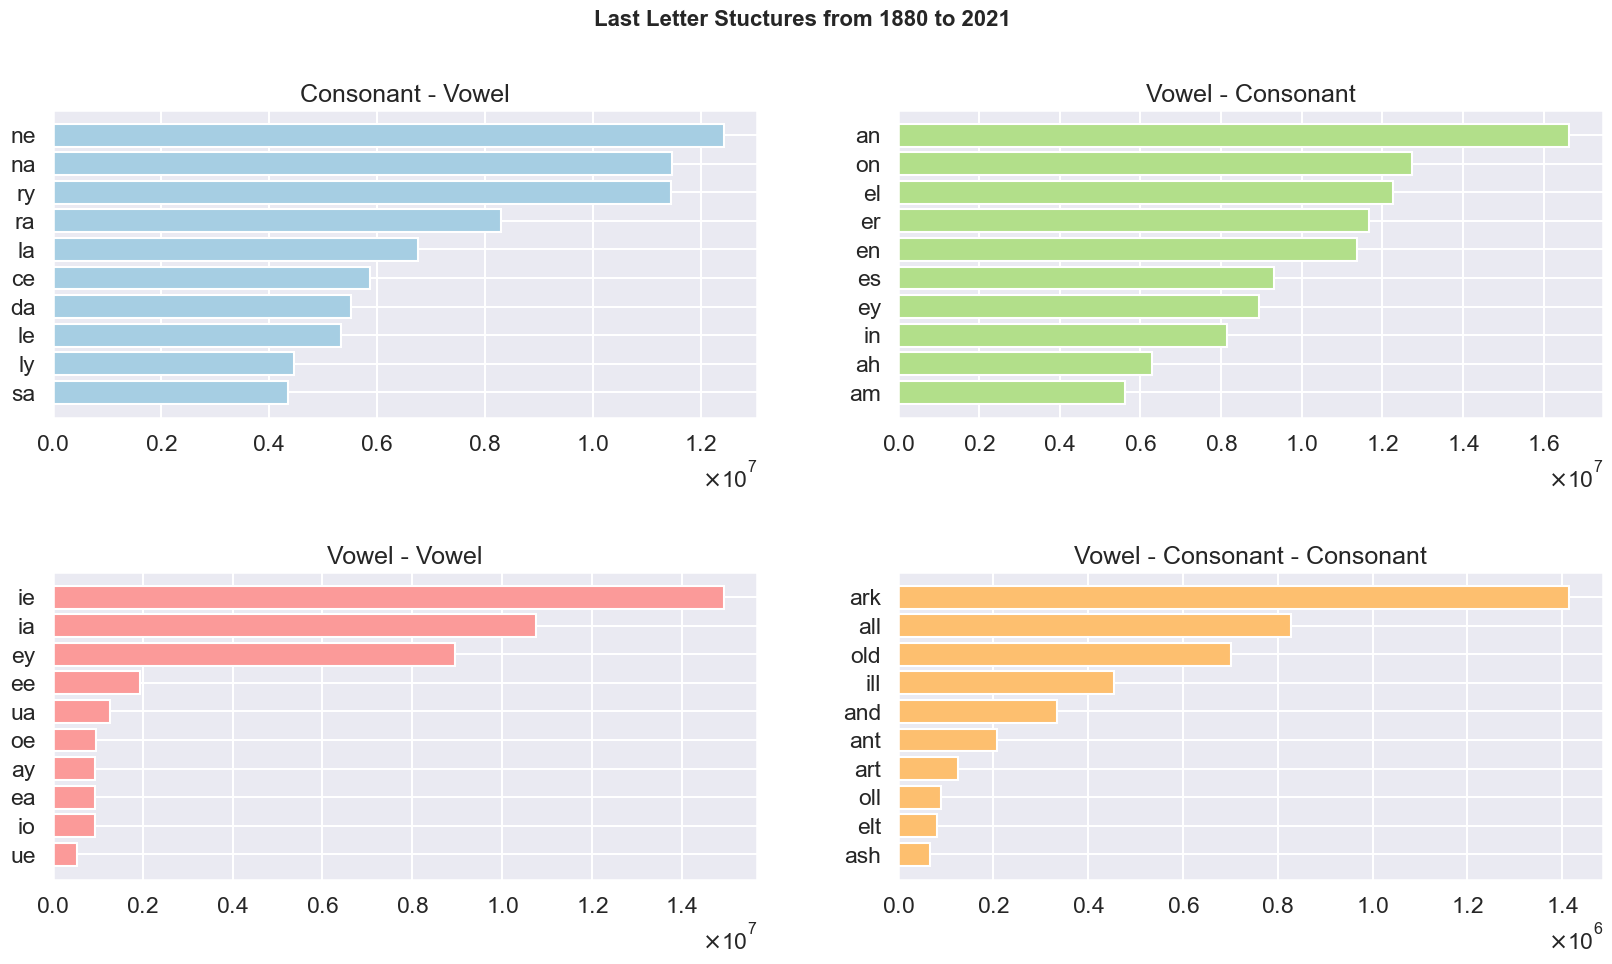

In [22]:
# Create the figure and axes
sns.set_style('darkgrid')
sns.set_context('talk')
colors = sns.color_palette("Paired")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))

# Plot the first chart on the first axis
ax1.barh(df_top10_cv['structure'], df_top10_cv['count'], color=colors[0])
ax1.invert_yaxis()
ax1.set_title('Consonant - Vowel')

# Plot the second chart on the second axis
ax2.barh(df_top10_vc['structure'], df_top10_vc['count'], color=colors[2])
ax2.invert_yaxis()
ax2.set_title('Vowel - Consonant')

# Plot the third chart on the third axis
ax3.barh(df_top10_vv['structure'], df_top10_vv['count'], color=colors[4])
ax3.invert_yaxis()
ax3.set_title('Vowel - Vowel')

# Plot the fourth chart on the fourth axis
ax4.barh(df_top10_vcc['structure'], df_top10_vcc['count'], color=colors[6])
ax4.invert_yaxis()
ax4.set_title('Vowel - Consonant - Consonant')

for ax in [ax1, ax2, ax3, ax4]:
    formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    formatter.set_scientific(True)
    ax.xaxis.set_major_formatter(formatter)

fig.subplots_adjust(hspace=0.5)
fig.suptitle('Last Letter Stuctures from 1880 to 2021', fontsize=16, fontweight='bold')
plt.show()

In [23]:
df_names_with_ne = df[df['name'].str.endswith('ne')]
df_names_with_ne = df_names_with_ne.groupby('year')['count'].sum().reset_index()
df_names_with_ne.name = 'ne'

df_names_with_na = df[df['name'].str.endswith('na')]
df_names_with_na = df_names_with_na.groupby('year')['count'].sum().reset_index()
df_names_with_na.name = 'na'

df_names_with_ry = df[df['name'].str.endswith('ry')]
df_names_with_ry = df_names_with_ry.groupby('year')['count'].sum().reset_index()
df_names_with_ry.name = 'ry'

df_names_with_an = df[df['name'].str.endswith('an')]
df_names_with_an = df_names_with_an.groupby('year')['count'].sum().reset_index()
df_names_with_an.name = 'an'

df_names_with_on = df[df['name'].str.endswith('on')]
df_names_with_on = df_names_with_on.groupby('year')['count'].sum().reset_index()
df_names_with_on.name = 'on'

df_names_with_el = df[df['name'].str.endswith('el')]
df_names_with_el = df_names_with_el.groupby('year')['count'].sum().reset_index()
df_names_with_el.name = 'el'

df_names_with_ie = df[df['name'].str.endswith('ie')]
df_names_with_ie = df_names_with_ie.groupby('year')['count'].sum().reset_index()
df_names_with_ie.name = 'ie'

df_names_with_ia = df[df['name'].str.endswith('ia')]
df_names_with_ia = df_names_with_ia.groupby('year')['count'].sum().reset_index()
df_names_with_ia.name = 'ia'

df_names_with_ey = df[df['name'].str.endswith('ey')]
df_names_with_ey = df_names_with_ey.groupby('year')['count'].sum().reset_index()
df_names_with_ey.name = 'ey'

df_names_with_ark = df[df['name'].str.endswith('ark')]
df_names_with_ark = df_names_with_ark.groupby('year')['count'].sum().reset_index()
df_names_with_ark.name = 'ark'


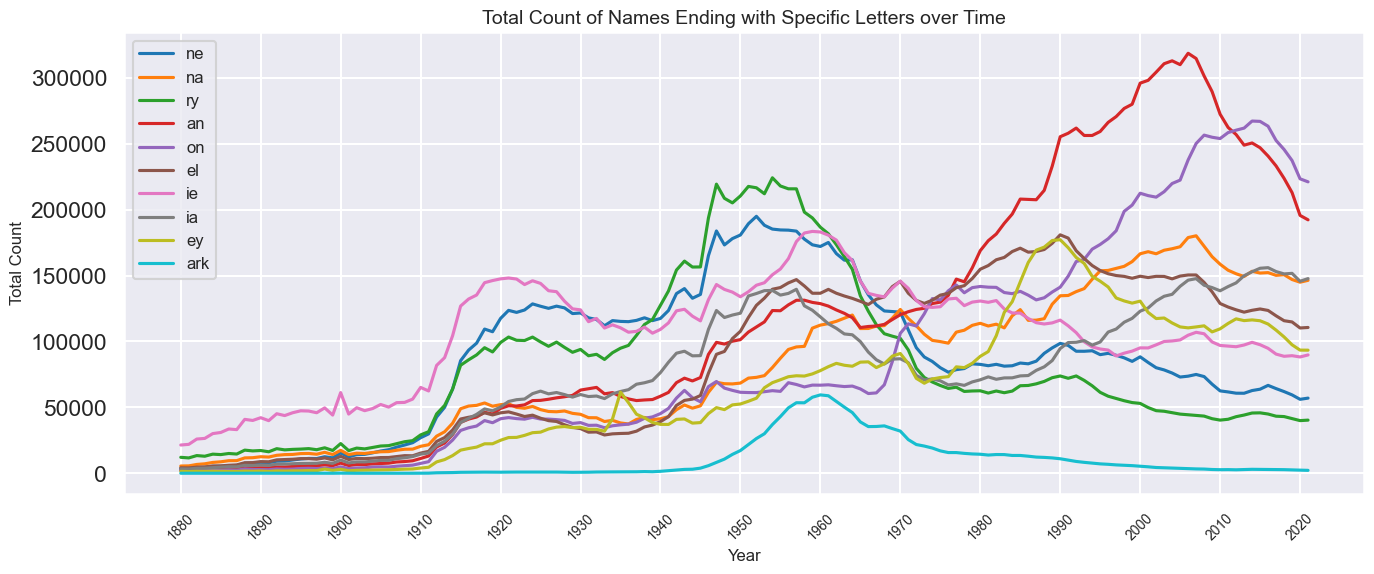

In [24]:
dataframes = [df_names_with_ne, df_names_with_na, df_names_with_ry, df_names_with_an, df_names_with_on, df_names_with_el, df_names_with_ie, df_names_with_ia, df_names_with_ey, df_names_with_ark]

fig, ax = plt.subplots(figsize=(16, 6))

# Plot each dataframe
for df in dataframes:
    sns.lineplot(data=df, x='year', y='count', ax=ax, label=df.name)

# Set the x-axis label and tick marks
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(df['year'].unique()[::10])
ax.set_xticklabels(df['year'].unique()[::10], fontsize=10, rotation=45)

# Set the y-axis label
ax.set_ylabel('Total Count', fontsize=12)

# Set the title
ax.set_title('Total Count of Names Ending with Specific Letters over Time', fontsize=14)

# Add the legend
ax.legend(fontsize=12)

# Conclusion

In conclusion, the analysis of the Baby Names dataset has revealed several interesting trends and insights about the naming habits of Americans. The popularity of names for females and males has remained consistent over the years, with slight variations in rankings. However, the top 10 names of 2021 for both genders differ from the historical popular names. The study also found that the uniqueness rate of names for both men and women is surprisingly low, indicating the practicality of using the same names.

Furthermore, the analysis of unisex names showed that there are several names used for both males and females, with varying rates over time. The study also identified the relative frequencies of different last letter combinations in unique names, with consonant-vowel and vowel-consonant structures being more popular than vowel-vowel or vowel-consonant-consonant structures.

Certain consonant-vowel and consonant-vowel-consonant combinations were found to be more common than others, such as "ne", "na", "ry", "an", "on", "el", and "ark". Additionally, the study revealed that certain last letter combinations, such as "gu", "fu", "xu", and "iw", were not found in the dataset of unique names.

The insights gained from this study could potentially be used in conjunction with semantic analysis of certain names to gain a deeper understanding of the cultural and social connotations associated with specific names. By analyzing the last letter patterns of names within a certain demographic or cultural group, researchers could uncover common phonetic preferences or linguistic trends, which could enrich the semantic analysis of the name and provide a more comprehensive understanding of its popularity and meaning.

Overall, the Baby Names dataset provides a unique insight into American naming habits and how they have changed over time. The dataset can be used by researchers and individuals interested in studying social and cultural trends in the United States.